# Machine Learning - Random Forest (Floresta Aleatória)

#### Importação das bibliotecas necessárias

In [46]:
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0) # set default size of plots

In [47]:
# Display image
def display(img):
    #plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

#### Carregando a base de dados.

In [48]:
df_edu = pd.read_csv('xAPI-Edu-Data.csv')

In [49]:
df_edu.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


#### Verificando as distribuições de classes.

In [50]:
df_edu['Class'].value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

#### Verificando os registros nulos

In [51]:
df_edu.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [65]:
df_edu.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


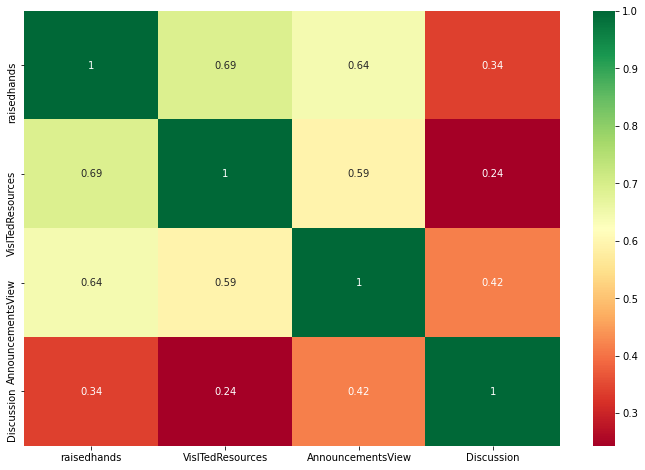

In [68]:
correlation = df_edu.corr(method='pearson')
sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn");

In [60]:
print("Percentage of topic")
df_edu['Topic'].value_counts(normalize=True)

Percentage of topic


IT           0.197917
French       0.135417
Arabic       0.122917
Science      0.106250
English      0.093750
Biology      0.062500
Spanish      0.052083
Geology      0.050000
Chemistry    0.050000
Quran        0.045833
Math         0.043750
History      0.039583
Name: Topic, dtype: float64

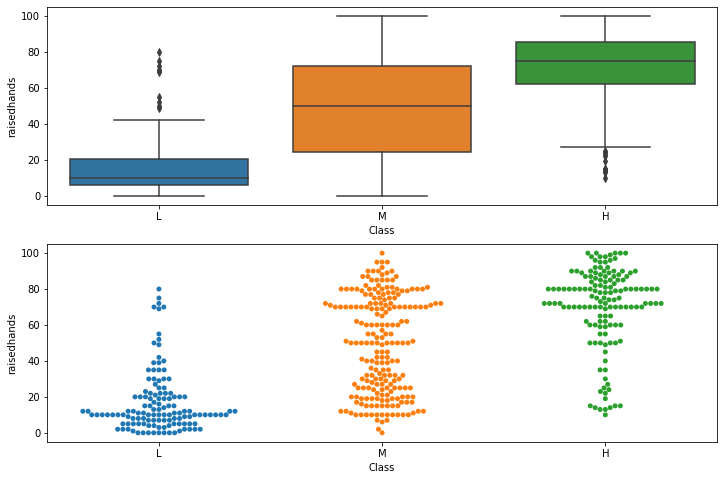

In [72]:
plt.subplot(2,1,1)
sns.boxplot(x="Class", order=['L','M','H'], y="raisedhands", data=df_edu)

plt.subplot(2,1,2)
sns.swarmplot(x="Class", order=['L','M','H'], y="raisedhands", data=df_edu)

plt.show()

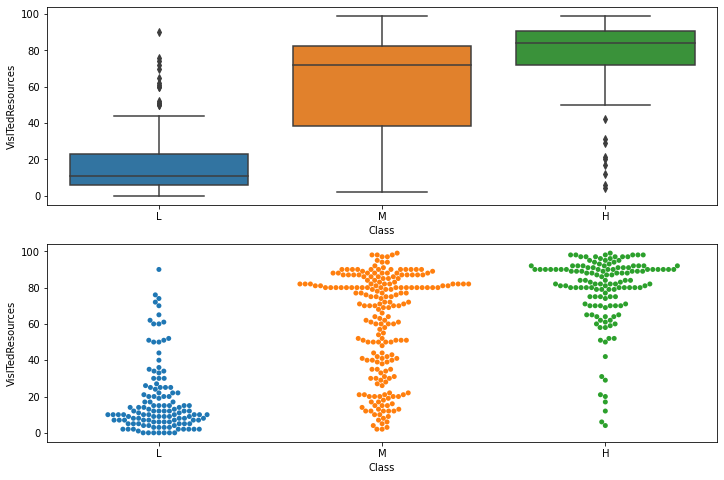

In [74]:
plt.subplot(2,1,1)
sns.boxplot(x="Class", order=['L','M','H'], y="VisITedResources", data=df_edu)

plt.subplot(2,1,2)
sns.swarmplot(x="Class", order=['L','M','H'], y="VisITedResources", data=df_edu)

plt.show()

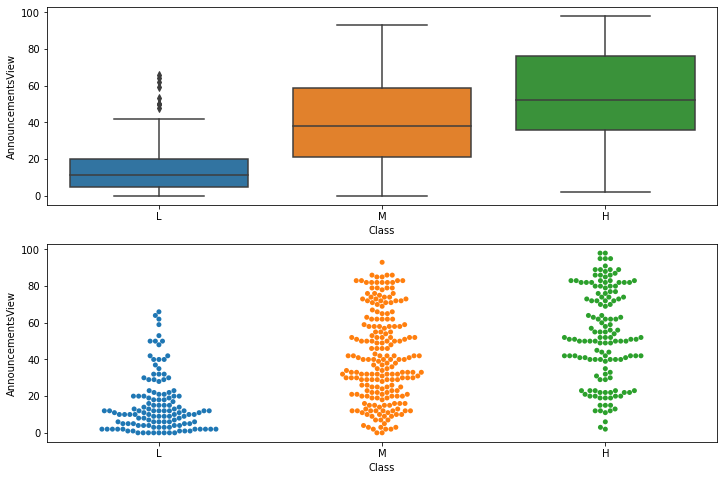

In [75]:
plt.subplot(2,1,1)
sns.boxplot(x="Class", order=['L','M','H'], y="AnnouncementsView", data=df_edu)

plt.subplot(2,1,2)
sns.swarmplot(x="Class", order=['L','M','H'], y="AnnouncementsView", data=df_edu)

plt.show()

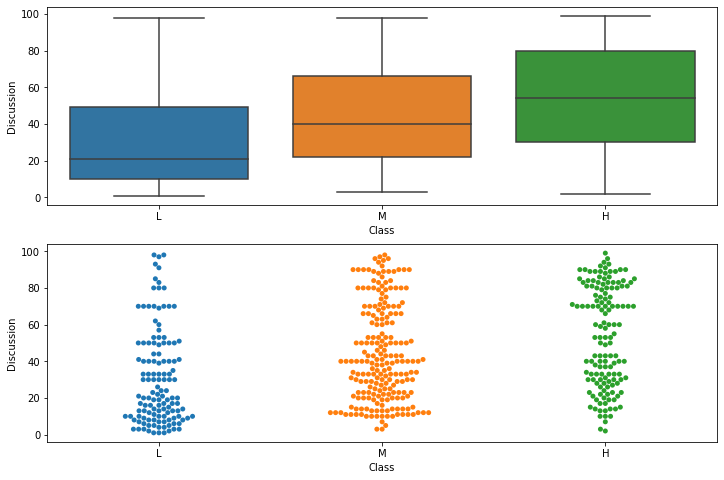

In [76]:

plt.subplot(2,1,1)
sns.boxplot(x="Class", order=['L','M','H'], y="Discussion", data=df_edu)

plt.subplot(2,1,2)
sns.swarmplot(x="Class", order=['L','M','H'], y="Discussion", data=df_edu)

plt.show()

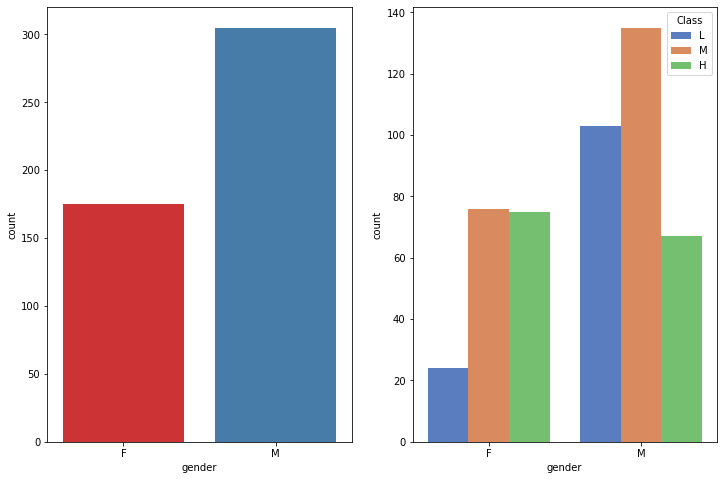

In [52]:
plt.subplot(1,2,1)
sns.countplot(x="gender", order=['F','M'], data=df_edu, palette="Set1")

plt.subplot(1,2,2)
sns.countplot(x="gender", order=['F','M'], hue="Class", hue_order=['L','M','H'], data=df_edu, palette="muted")

plt.show();

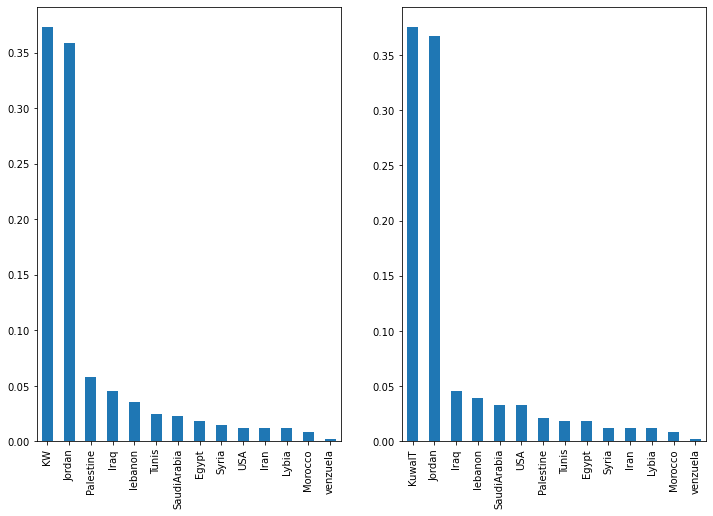

In [53]:

plt.subplot(1,2,1)
df_edu['NationalITy'].value_counts(normalize=True).plot(kind='bar')

plt.subplot(1,2,2)
df_edu['PlaceofBirth'].value_counts(normalize=True).plot(kind='bar')

plt.show()

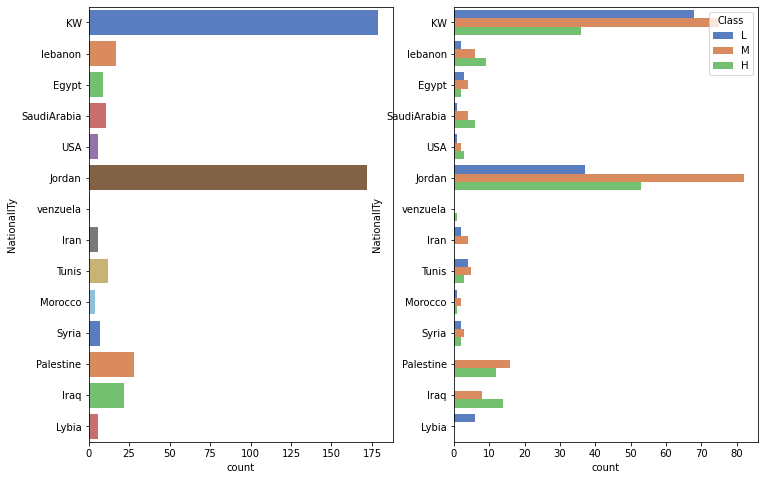

In [54]:
plt.subplot(1,2,1)
sns.countplot(y="NationalITy", data=df_edu, palette="muted")

plt.subplot(1,2,2)
sns.countplot(y="NationalITy", hue="Class", hue_order=['L','M','H'], data=df_edu, palette="muted")

plt.show()

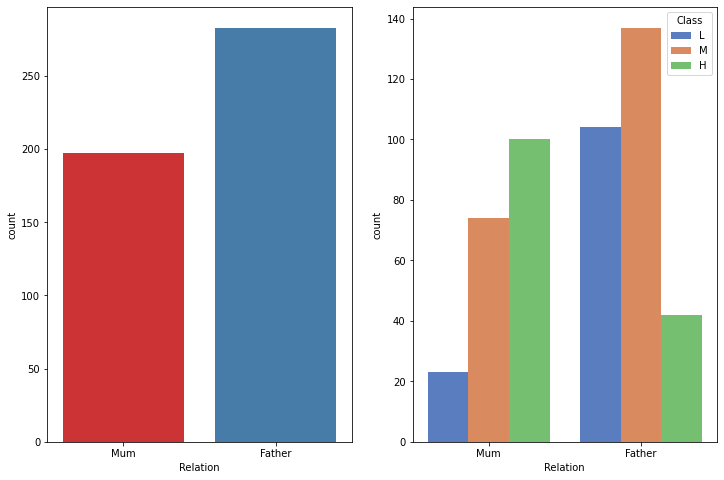

In [55]:
plt.subplot(1,2,1)
sns.countplot(x="Relation", order=['Mum','Father'], data=df_edu, palette="Set1")

plt.subplot(1,2,2)
sns.countplot(x="Relation", order=['Mum','Father'], hue="Class", hue_order=['L','M','H'], data=df_edu, palette="muted")

plt.show()

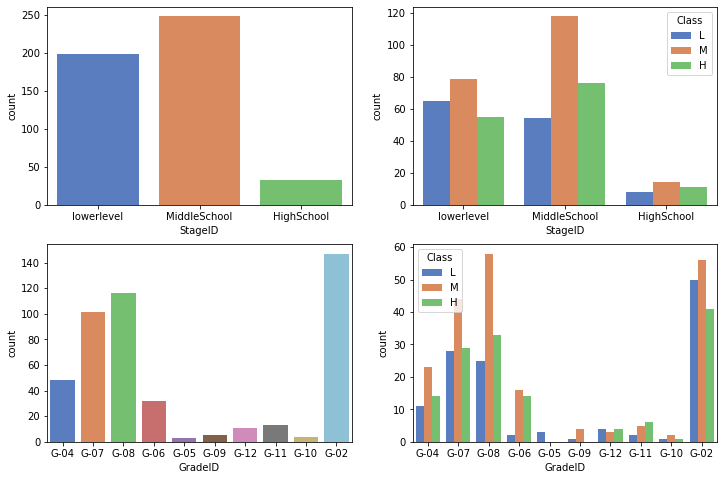

In [56]:
plt.subplot(2,2,1)
sns.countplot(x="StageID", data=df_edu, palette="muted")

plt.subplot(2,2,2)
sns.countplot(x="StageID", hue="Class", hue_order=['L','M','H'], data=df_edu, palette="muted")

plt.subplot(2,2,3)
sns.countplot(x="GradeID", data=df_edu, palette="muted")

plt.subplot(2,2,4)
sns.countplot(x="GradeID", hue="Class", hue_order=['L','M','H'], data=df_edu, palette="muted")


plt.show()

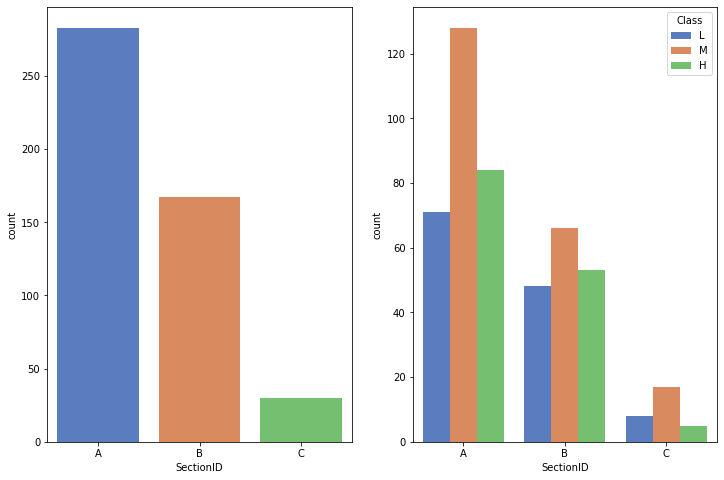

In [57]:

plt.subplot(1,2,1)
sns.countplot(x="SectionID", order=['A','B','C'], data=df_edu, palette="muted")

plt.subplot(1,2,2)
sns.countplot(x="SectionID", order=['A','B','C'], hue="Class", hue_order=['L','M','H'], data=df_edu, palette="muted")

plt.show()

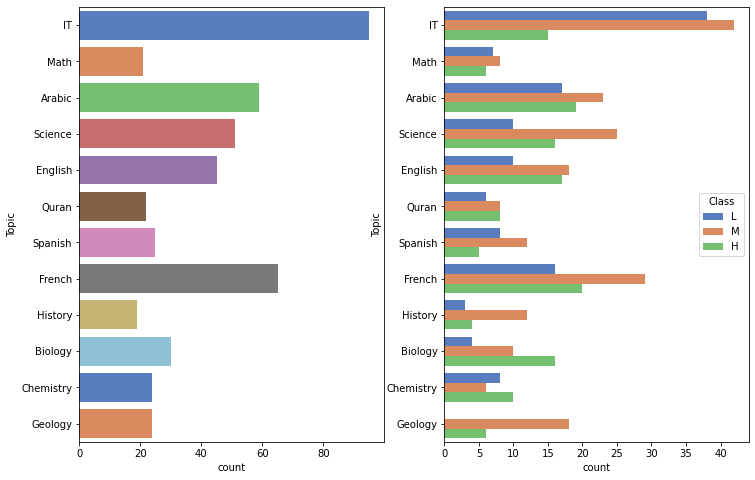

In [59]:
plt.subplot(1,2,1)
sns.countplot(y="Topic", data=df_edu, palette="muted")

plt.subplot(1,2,2)
sns.countplot(y="Topic", hue="Class", hue_order=['L','M','H'], data=df_edu, palette="muted")

plt.show()

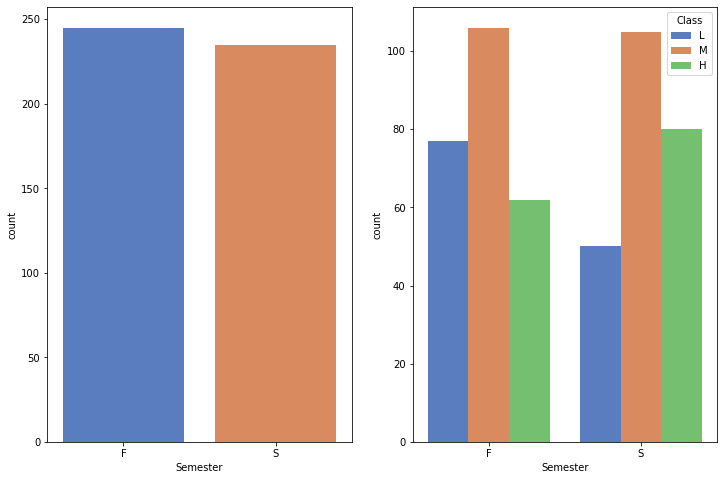

In [61]:
plt.subplot(1,2,1)
sns.countplot(x="Semester", order=['F','S'], data=df_edu, palette="muted")

plt.subplot(1,2,2)
sns.countplot(x="Semester", order=['F','S'], hue="Class", hue_order=['L','M','H'], data=df_edu, palette="muted")

plt.show()

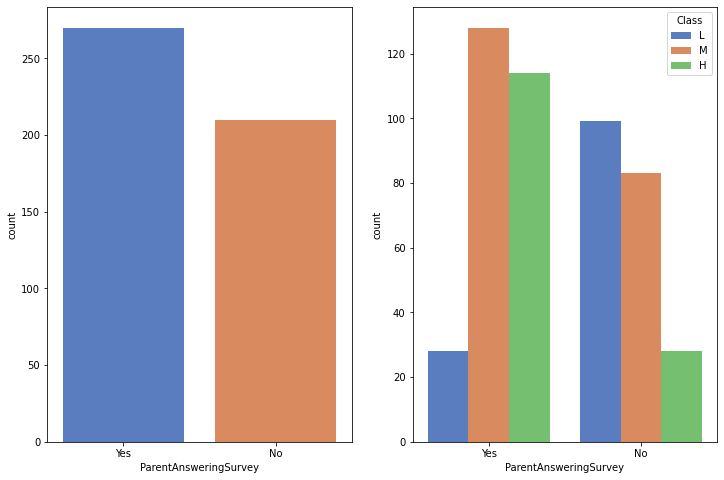

In [62]:

plt.subplot(1,2,1)
sns.countplot(x="ParentAnsweringSurvey", data=df_edu, palette="muted")

plt.subplot(1,2,2)
sns.countplot(x="ParentAnsweringSurvey", hue="Class", hue_order=['L','M','H'], data=df_edu, palette="muted")

plt.show()

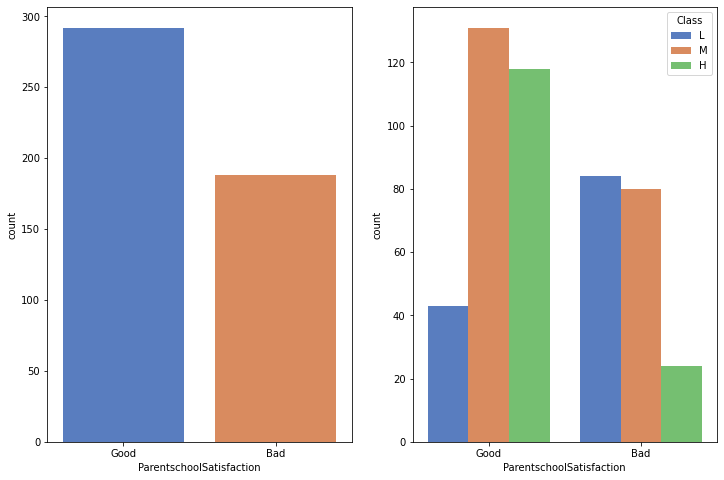

In [63]:
plt.subplot(1,2,1)
sns.countplot(x="ParentschoolSatisfaction", data=df_edu, palette="muted")

plt.subplot(1,2,2)
sns.countplot(x="ParentschoolSatisfaction", hue="Class", hue_order=['L','M','H'], data=df_edu, palette="muted")

plt.show()

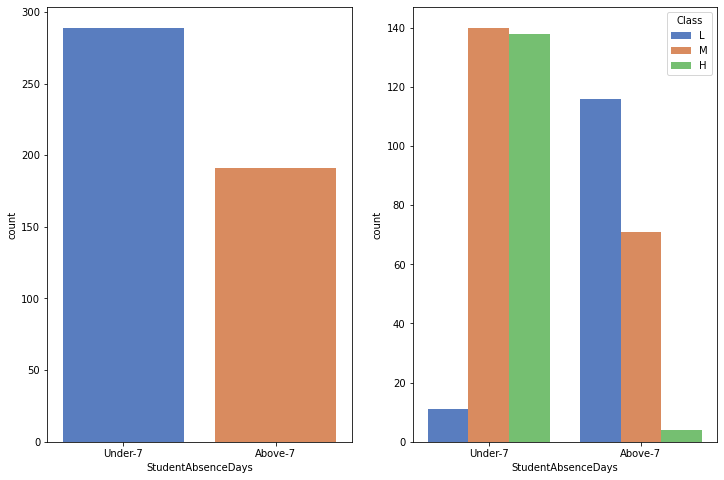

In [64]:
plt.subplot(1,2,1)
sns.countplot(x="StudentAbsenceDays", data=df_edu, palette="muted")

plt.subplot(1,2,2)
sns.countplot(x="StudentAbsenceDays", hue="Class", hue_order=['L','M','H'], data=df_edu, palette="muted")

plt.show()

#### Codificando os atributos numéricos.

In [6]:
Features = df_edu
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    label = LabelEncoder()
    Features[col] = label.fit_transform(Features[col])

In [7]:
Features.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2


#### Dividindo os dados em treino e teste

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df_edu.drop('Class',axis=1),df_edu['Class'],test_size=0.3,random_state=0)

#### Verificando a forma dos dados

In [10]:
X_train.shape,X_test.shape

((336, 16), (144, 16))

In [11]:
y_train.shape,y_test.shape

((336,), (144,))

#### Instânciando o objeto classificador

In [12]:
random_clf = RandomForestClassifier()

#### Parâmetros do  objeto RandomForestClassifier
* <span style="color:red">n_estimators: número de árvores que serão criadas na floresta.</span>
* <span style="color:red"> bootstrap: se será considerado o bootstrap dataset durante a criação das árvores.</span>
* <span style="color:red"> max_features: número total de features que as árvores serão criadas.</span>
* criterion: medida de qualidade da divisão.
* splitter: estratégia utilizada para dividir o nó de decisão.
* max_depth: profundidade máxima da árvore.
* min_samples_split: número de amostras mínimas para considerar um nó para divisão.
* min_samples_leaf: número de amostras mínimas no nível folha.

#### Treinando o modelo Random Forest

In [13]:
random_clf.fit(X_train,y_train)

RandomForestClassifier()

#### Predizendo as classes a partir do modelo treinado utilizando o conjunto de teste

In [14]:
resultado = random_clf.predict(X_test)

In [15]:
resultado

array([2, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2,
       2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 0,
       2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 2,
       1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 2, 2, 1, 1, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 2, 0, 1, 0, 1, 2,
       1, 2, 1, 1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       0, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0])

#### Métricas de Validação

In [16]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73        39
           1       0.79      0.91      0.85        34
           2       0.79      0.77      0.78        71

    accuracy                           0.78       144
   macro avg       0.78      0.79      0.79       144
weighted avg       0.78      0.78      0.78       144



#### Verificando as features mais importantes para o modelo treinado

In [17]:
random_clf.feature_importances_

array([0.02236794, 0.03481618, 0.03642905, 0.01887251, 0.03267434,
       0.02102198, 0.04433614, 0.01078546, 0.04589311, 0.16094676,
       0.16179555, 0.12065543, 0.08745229, 0.03810396, 0.0229333 ,
       0.140916  ])

In [18]:
feature_imp = pd.Series(random_clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)

In [19]:
feature_imp

VisITedResources            0.161796
raisedhands                 0.160947
StudentAbsenceDays          0.140916
AnnouncementsView           0.120655
Discussion                  0.087452
Relation                    0.045893
Topic                       0.044336
ParentAnsweringSurvey       0.038104
PlaceofBirth                0.036429
NationalITy                 0.034816
GradeID                     0.032674
ParentschoolSatisfaction    0.022933
gender                      0.022368
SectionID                   0.021022
StageID                     0.018873
Semester                    0.010785
dtype: float64

#### Features mais importantes de forma gráfica

In [20]:
def visualiza_features_importantes(features_lista):
    %matplotlib inline

    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index)

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()

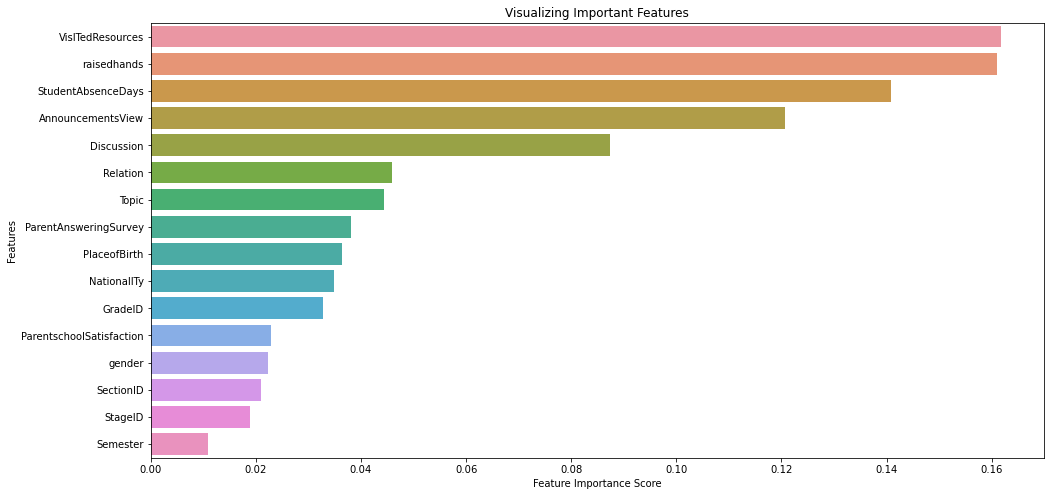

In [21]:
visualiza_features_importantes(feature_imp)

#### Selecionando apenas as features com importancia acima de um determinado score.

In [22]:
features_selecionadas = []
for feature,importancia in feature_imp.iteritems():
    if importancia > 0.03:
        print("{}:\t{}".format(feature, importancia))
        features_selecionadas.append(feature)

VisITedResources:	0.161795554809113
raisedhands:	0.16094676002507788
StudentAbsenceDays:	0.1409159993004986
AnnouncementsView:	0.12065543255994039
Discussion:	0.08745229481115359
Relation:	0.0458931103511954
Topic:	0.04433613654091866
ParentAnsweringSurvey:	0.03810396106117288
PlaceofBirth:	0.03642904829002976
NationalITy:	0.034816179602920695
GradeID:	0.03267433508605823


#### Separando os dados em treino e teste utilizando apenas as features selecionadas

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    df_edu[features_selecionadas],
    df_edu['Class'],
    test_size=0.3,
    random_state=0
)

#### Verificando a nova forma dos dados

In [24]:
X_train.shape,X_test.shape

((336, 11), (144, 11))

In [25]:
y_train.shape,y_test.shape

((336,), (144,))

#### Instânciando o objeto classificador

In [26]:
random_clf = RandomForestClassifier(random_state=0)

#### Treinando novamente o modelo Random Forest

In [27]:
random_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

#### Executando o algoritmo de arvore de decisão com o conjunto de teste

In [28]:
resultado = random_clf.predict(X_test)
resultado

array([2, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 2, 0, 1, 2, 0, 0, 1, 1, 0, 1, 0,
       2, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 0,
       2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 2,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 2, 2, 1, 1, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 2, 1, 2, 1, 0, 1, 0, 2, 1, 2, 0, 1, 0, 1, 2,
       1, 2, 1, 1, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1,
       0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0])

#### Métricas de Validação

In [29]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72        39
           1       0.82      0.94      0.88        34
           2       0.81      0.73      0.77        71

    accuracy                           0.78       144
   macro avg       0.78      0.81      0.79       144
weighted avg       0.79      0.78      0.78       144



## Explorando as árvores da Floresta gerada

In [30]:
print("Número de árvores da floresta: {}".format(len(random_clf.estimators_)))
print("Árvores floresta gerada:")
for tree in random_clf.estimators_:
    print("\nNumero de nós: {}".format(tree.tree_.node_count))
    print("Profundidade da árvore: {}".format(tree.tree_.max_depth))
    print("Features importantes: {}".format(tree.feature_importances_))
    print("\nObjeto: {}".format(tree))


Número de árvores da floresta: 100
Árvores floresta gerada:

Numero de nós: 127
Profundidade da árvore: 12
Features importantes: [0.15991947 0.18315429 0.24943917 0.04982349 0.0331741  0.0675
 0.0112559  0.03879975 0.05999842 0.0622962  0.08463921]

Objeto: DecisionTreeClassifier(max_features='auto', random_state=209652396)

Numero de nós: 145
Profundidade da árvore: 13
Features importantes: [0.18743742 0.10967617 0.2063414  0.11320926 0.07788095 0.03911594
 0.06272667 0.10337816 0.03801143 0.01497378 0.04724882]

Objeto: DecisionTreeClassifier(max_features='auto', random_state=398764591)

Numero de nós: 157
Profundidade da árvore: 11
Features importantes: [0.05195041 0.30540607 0.08188909 0.18427224 0.08916822 0.05195157
 0.08433087 0.07299361 0.05442788 0.00715918 0.01645088]

Objeto: DecisionTreeClassifier(max_features='auto', random_state=924231285)

Numero de nós: 151
Profundidade da árvore: 11
Features importantes: [0.0801578  0.10511533 0.13303291 0.13257337 0.16455564 0.1094210

#### Selecionando uma árvore da floresta

In [31]:
tree0 = random_clf.estimators_[0]

#### Visualizando de forma gráfica

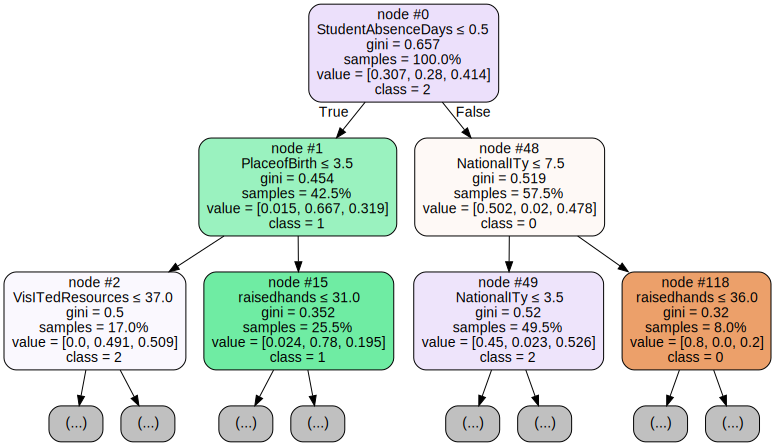

In [32]:
from sklearn.tree import export_graphviz
import graphviz 

dot_data = export_graphviz(
         tree0,
         max_depth=2,
         out_file=None,
         feature_names=X_train.columns,
         class_names=['0','1','2'], 
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph

#### Selecionando outra árvore da floresta

In [33]:
tree1 = random_clf.estimators_[1]

#### Visualizando de forma gráfica

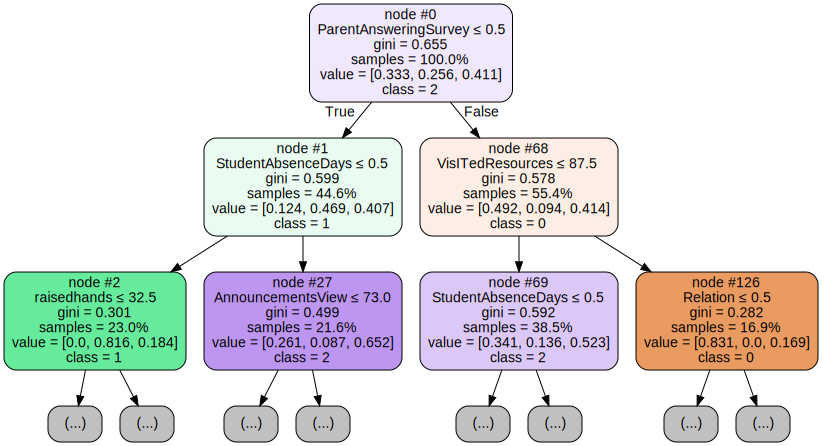

In [34]:
dot_data = export_graphviz(
         tree1,
         max_depth=2,
         out_file=None,
         feature_names=X_train.columns,
         class_names=['0','1','2'], 
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph